In [5]:
import os
import re
import json
import time
import requests
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from web3 import Web3
w3 = Web3(Web3.HTTPProvider('http://127.0.0.1:8545'))

def exec(commandString):
    output_stream = os.popen(commandString)
    res = output_stream.read()
    output_stream.close()
    return res

def extractAddress(response, label):
    match = re.findall(re.escape(label) + r"\s+0x[a-fA-F0-9]{40}", response)
    return match[0].split()[-1]

In [6]:
currentTime = int(time.time() * 1000)
daySeconds = 24*3600
dayMSeconds = 1000*daySeconds
START_DATE = 1561687200000;
END_DATE = currentTime  - dayMSeconds - (currentTime%dayMSeconds)
nDAYS = 'max'
AMPL_INITIAL_SUPPLY = 50000000

amplHistroy = json.loads(requests.get('https://web-api.ampleforth.org/eth/token-rebase-history').content)
amplDf = pd.DataFrame(amplHistroy, columns=['epoch', 'price', 'price_target', 'supply', 'time'])
amplDf['time'] = (amplDf['time'] - (amplDf['time'] % daySeconds))
amplDf['time'] = pd.to_datetime(amplDf['time'], unit='s')
amplDf = amplDf.set_index('time')
amplDf['marketcap'] = amplDf['price'] * amplDf['supply']

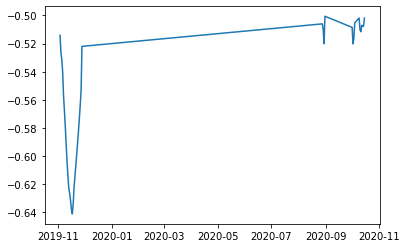

In [17]:
r = amplDf['supply'].pct_change(periods=28)
plt.plot(r[r<-0.5])
plt.show()